# Using TGCN for speed prediction of the traffic

This notebook uses the Seoul traffic speed dataset (Transport Operation & Information Service (TOPIS)). the dataset contains two sets: Urban-core and Urban-mix datasets. The data was gathered from april 1st, 2018 to april 30th, 2018. The dataset is 5-minute interval speed data for road segments in the Seoul traffic. The data can be downloaded from https://github.com/yuyolshin/SeoulSpeedData

The data consists of 304 sensors, with 8640 observations each 5 minutes for 30 days (30daysx24hoursx12intervals=8640), Each observation starts usually at 0 or 1 speed 


In [1]:
import warnings
warnings.filterwarnings('ignore')

The following map shows 

a) Urban core dataset

b) Urban mix dataset

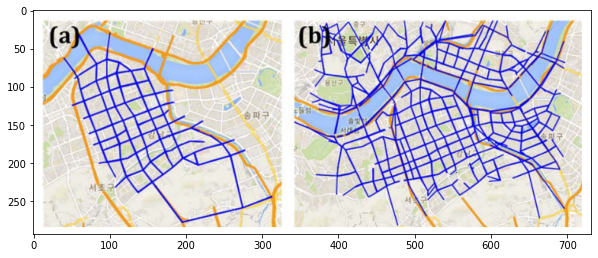

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
plt.imshow(mpimg.imread('https://user-images.githubusercontent.com/31876093/141141076-7d44ed1e-7868-4cf4-9e93-3597b1d97f9f.png'))
plt.show()

## Using Seoul Urban Core Data

In [3]:
import pandas as pd
import numpy as np

def read_data():
    urban_core_speeds = pd.read_csv('../input/seoul-speed-data/urban-core.csv', header=None)
    adj_matrix_df = pd.read_csv('../input/seoul-speed-data/Adj(urban-core).csv', header=None)
    adj_matrix = np.array(adj_matrix_df)

    speeds_df = urban_core_speeds.iloc[:, 7:]
    speeds = np.array(speeds_df)
    
    return adj_matrix_df, urban_core_speeds, adj_matrix, speeds

In [4]:
adj_matrix_df, urban_core_speeds, adj_matrix, speeds = read_data()

In [5]:
adj_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
urban_core_speeds

,0,1,2,3,4,5,6,7,8,9,...,8637,8638,8639,8640,8641,8642,8643,8644,8645,8646
0,1.210006e+09,6200.0,201560.3779,446938.8683,60.0,353.0,0.0,49.39,49.74,48.69,...,49.58,48.15,48.96,49.07,49.03,48.96,49.44,48.72,49.80,49.58
1,1.210006e+09,6300.0,201571.2295,446944.0685,60.0,359.0,1.0,53.34,52.38,53.20,...,51.13,51.34,51.28,51.90,51.91,50.70,50.95,51.55,52.99,52.20
2,1.210007e+09,7000.0,208647.6878,440703.4867,60.0,3084.0,0.0,39.47,39.22,38.84,...,35.42,36.83,36.93,36.18,35.79,34.78,35.94,36.47,34.78,35.21
3,1.210007e+09,7100.0,208703.2065,440694.2090,60.0,3077.0,1.0,29.02,34.66,34.49,...,29.60,32.36,32.66,33.09,33.77,30.38,48.38,36.53,33.29,33.24
4,1.210008e+09,7800.0,205525.6112,441413.0221,60.0,2429.0,1.0,48.33,46.12,50.23,...,46.60,50.99,51.81,48.02,48.25,47.16,48.07,46.30,47.90,52.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1.220037e+09,36900.0,203020.8489,447993.1900,60.0,419.0,0.0,46.22,44.86,47.40,...,40.56,40.47,40.69,39.66,41.80,41.70,40.72,37.27,42.97,41.78
300,1.220037e+09,37000.0,202025.3534,448209.1085,60.0,1028.0,1.0,57.24,56.30,57.34,...,55.40,56.44,58.30,55.26,56.32,57.12,55.97,58.98,57.34,60.92
301,1.220037e+09,37100.0,201998.4093,448309.9847,60.0,1024.0,0.0,59.56,57.49,59.51,...,39.56,42.05,36.17,45.71,43.80,47.92,49.52,52.32,50.18,57.08
302,1.220037e+09,37200.0,203027.4559,448161.0135,60.0,852.0,1.0,61.14,60.25,59.74,...,61.10,58.90,59.38,59.47,62.37,59.50,61.51,59.59,60.62,61.42


In [7]:
"""Each sensor record an obseravtion either 0 or 1 at the beginning of the recording"""
set(urban_core_speeds.iloc[: , 6])

{0.0, 1.0}

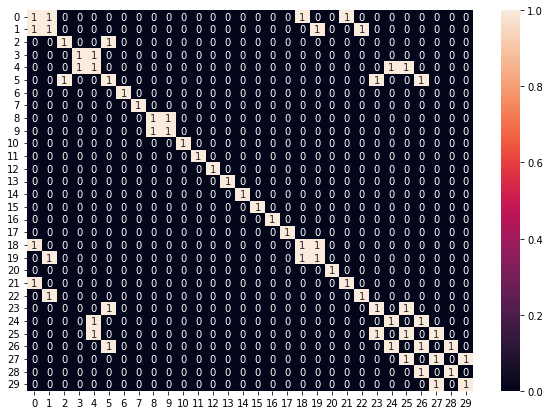

In [8]:
"""plot the first 30 sensors adjacency matrix"""
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
ax = sns.heatmap(adj_matrix[:30, :30], annot=True)
plt.show()

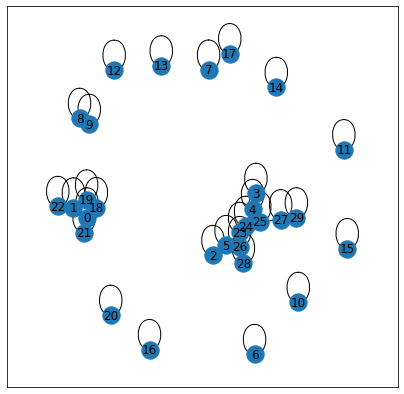

In [9]:
"""Network graph of the nodes"""
import networkx as nx

G = nx.from_numpy_array(adj_matrix[:30, :30])
G.edges(data=True)
plt.figure(figsize=(7,7))
nx.draw_networkx(G)
plt.axis('equal')
plt.show()

So, the data consists of 8639 exclusing the first observation. 

We start here by train test split. Since each sensor has a series of speeds, The train data will be the first 75% of the recoding and the rest will be the test data 

In [10]:
train_test_split = 0.75

split = int(speeds.shape[1] * train_test_split)
train_data = speeds[:, :split]
test_data = speeds[:, split:]

print("Train data: ", train_data.shape)
print("Test data: ", test_data.shape)

Train data:  (304, 6480)
Test data:  (304, 2160)


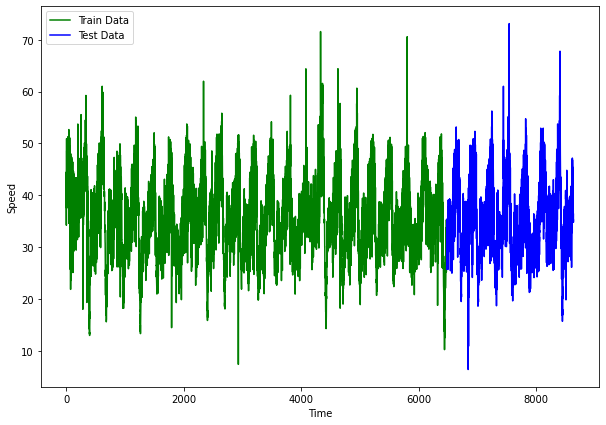

In [35]:
plt.figure(figsize=(10,7))
plt.plot(range(len(train_data[2])), train_data[2], 'g', label="Train Data")
plt.plot(range(len(train_data[2]), len(speeds[2])), test_data[2], 'b', label="Test Data")
plt.xlabel('Time')
plt.ylabel('Speed')
plt.legend(loc="upper left")
plt.show()

In [11]:
"""Min max standardizing the data"""
max_speed = train_data.max()
min_speed = train_data.min()
train_scaled = (train_data - min_speed) / (max_speed - min_speed)
test_scaled = (test_data - min_speed) / (max_speed - min_speed)

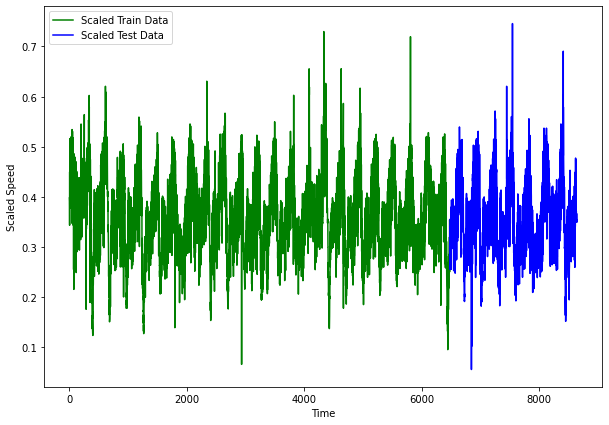

In [38]:
plt.figure(figsize=(10,7))
plt.plot(range(len(train_data[2])), train_scaled[2], 'g', label="Scaled Train Data")
plt.plot(range(len(train_data[2]), len(speeds[2])), test_scaled[2], 'b', label="Scaled Test Data")
plt.xlabel('Time')
plt.ylabel('Scaled Speed')
plt.legend(loc="upper left")
plt.show()

In [39]:
seq_len = 10
pre_len = 12

def sequence_data_preparation(seq_len, pre_len, train_data, test_data):
    trainX, trainY, testX, testY = [], [], [], []

    for i in range(train_data.shape[1] - int(seq_len + pre_len - 1)):
        a = train_data[:, i : i + seq_len + pre_len]
        trainX.append(a[:, :seq_len])
        trainY.append(a[:, -1])

    for i in range(test_data.shape[1] - int(seq_len + pre_len - 1)):
        b = test_data[:, i : i + seq_len + pre_len]
        testX.append(b[:, :seq_len])
        testY.append(b[:, -1])

    trainX = np.array(trainX)
    trainY = np.array(trainY)
    testX = np.array(testX)
    testY = np.array(testY)

    return trainX, trainY, testX, testY


trainX, trainY, testX, testY = sequence_data_preparation(seq_len, pre_len, train_scaled, test_scaled)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(6459, 304, 10)
(6459, 304)
(2139, 304, 10)
(2139, 304)


In [40]:
%%capture    
!pip install stellargraph

In [43]:
from stellargraph.layer import GCN_LSTM
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

def build_model():

    gcn_lstm = GCN_LSTM(
        seq_len=seq_len,
        adj=adj_matrix,
        gc_layer_sizes=[16, 10],
        gc_activations=["relu", "relu"],
        lstm_layer_sizes=[200, 200],
        lstm_activations=["tanh", "tanh"],
    )

    x_input, x_output = gcn_lstm.in_out_tensors()
    model = Model(inputs=x_input, outputs=x_output)
    model.compile(optimizer="adam", loss="mae", metrics=["mse"])
    
    return model

In [44]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 304, 10)]         0         
_________________________________________________________________
tf.expand_dims (TFOpLambda)  (None, 304, 10, 1)        0         
_________________________________________________________________
reshape (Reshape)            (None, 304, 10)           0         
_________________________________________________________________
fixed_adjacency_graph_convol (None, 304, 16)           92880     
_________________________________________________________________
fixed_adjacency_graph_convol (None, 304, 10)           92880     
_________________________________________________________________
reshape_1 (Reshape)          (None, 304, 10, 1)        0         
_________________________________________________________________
permute (Permute)            (None, 10, 304, 1)        0     

In [45]:
history = model.fit(trainX, trainY, epochs=20, batch_size=32, shuffle=True, verbose=1, validation_split=0.1)

2022-01-30 11:30:44.275615: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
182/182 [==============================] - 15s 54ms/step - loss: 0.0663 - mse: 0.0087 - val_loss: 0.0417 - val_mse: 0.0034
Epoch 2/20
182/182 [==============================] - 9s 49ms/step - loss: 0.0437 - mse: 0.0035 - val_loss: 0.0391 - val_mse: 0.0030
Epoch 3/20
182/182 [==============================] - 10s 53ms/step - loss: 0.0409 - mse: 0.0032 - val_loss: 0.0381 - val_mse: 0.0029
Epoch 4/20
182/182 [==============================] - 9s 49ms/step - loss: 0.0391 - mse: 0.0029 - val_loss: 0.0377 - val_mse: 0.0029
Epoch 5/20
182/182 [==============================] - 9s 48ms/step - loss: 0.0380 - mse: 0.0028 - val_loss: 0.0378 - val_mse: 0.0029
Epoch 6/20
182/182 [==============================] - 9s 49ms/step - loss: 0.0368 - mse: 0.0026 - val_loss: 0.0368 - val_mse: 0.0027
Epoch 7/20
182/182 [==============================] - 10s 53ms/step - loss: 0.0360 - mse: 0.0025 - val_loss: 0.0363 - val_mse: 0.0027
Epoch 8/20
182/182 [==============================] - 9s 49ms/step

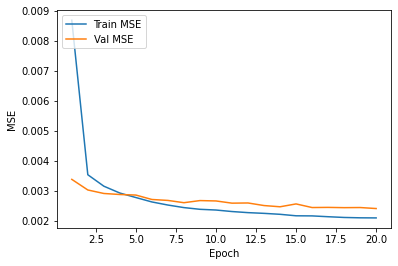

In [49]:
mse = history.history['mse']
loss = history.history['loss']
val_mse = history.history['val_mse']
val_loss = history.history['val_loss']

epochs = range(1, len(mse)+1)

#------------------------------------------------
# training and validation mse per epoch
#------------------------------------------------

plt.plot(epochs, mse, label='Train MSE')
plt.plot(epochs, val_mse, label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc="upper left")
plt.show()

In [50]:
train_preds = model.predict(trainX)
test_preds = model.predict(testX)

In [51]:
## descale values (get original values before scaling)
max_speed = train_data.max()
min_speed = train_data.min()

## actual train and test values
train_original = np.array(trainY * max_speed)
test_original = np.array(testY * max_speed)
## Rescale model predicted values
train_preds = np.array((train_preds) * max_speed)
test_preds = np.array((test_preds) * max_speed)

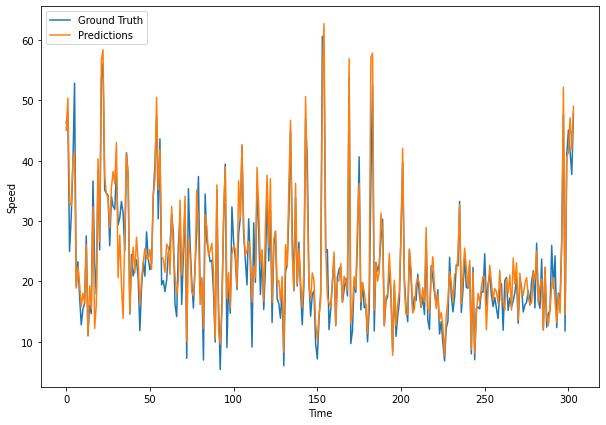

In [56]:
plt.figure(figsize=(10,7))
plt.plot(range(len(test_original[2])), test_original[2], label='Ground Truth')
plt.plot(range(len(test_preds[2])), test_preds[2], label='Predictions')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.legend(loc="upper left")
plt.show()

## Using Seoul Urban Mix Data

# References

-  Shin, Y., & Yoon, Y. (2020). Incorporating dynamicity of transportation network with multi-weight traffic graph convolutional network for traffic forecasting. IEEE Transactions on Intelligent Transportation Systems.

- https://stellargraph.readthedocs.io/en/stable/demos/time-series/gcn-lstm-time-series.html
